In [363]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<h4>Import the datasets and join the data based on appropriate column.</h4>

In [364]:
#Load the dataset from the csv file.
df_A = pd.read_csv("athlete_events.csv") 

display(df_A.head(5))
print(df_A.shape)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


(271116, 15)


In [365]:
df_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [366]:
print("number of rows = ", df_A.shape[0])
print("number of columnes = ", df_A.shape[1])

number of rows =  271116
number of columnes =  15


In [367]:
df_A.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [368]:
df_A.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [369]:
df_B = pd.read_csv("regions.csv")
display(df_B.head())

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [370]:
df_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [371]:
#joinig the two datasets. 
df = df_A.merge(df_B, how="left" )

display(df.head(5))
print(df.shape)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


(271116, 17)


<h4>Check for columns that have nan values</h4>

In [372]:
#Checking for Nan columns.
nan_values = df.isna()

print(nan_values.sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64


<p> In above the columns that have nan values are:
    <ul>
        <li> Age    = 9474 Nan values. </li>
        <li> Height = 60171 Nan values. </li>
        <li> Weight = 62875 Nan values. </li>
        <li> Medal  = 231333 Nan values. </li>
        <li> region = 370 Nan values. </li>
        <li> notes  = 266077 Nan values. </li>
    </ul>
    
</p>

<h4>For numeric columns, replace nan values with the column’s mean.</h4>


In [373]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [374]:
#Creating a new variable to keep the numeric column for replacing the nan value.
x = df[["Age","Height","Weight"]]

#checking the mean of "x" variable.
print(x.mean()) 

# replacing the nan values with columns mean.
x = np.round(x.fillna(x.mean()),2) 
# display(x.head(10))

df[["Age","Height","Weight"]] = x

df["Age"] = df[["Age"]].astype("int64")  #changing the "Age" datatype from float to integer. 
display(df.head(5))


Age        25.556898
Height    175.338970
Weight     70.702393
dtype: float64


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24,180.00,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23,170.00,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24,175.34,70.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34,175.34,70.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21,185.00,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


<h4>Which are the top 10 countries with most gold, silver, bronze medal?</h4>

In [375]:
#create new dataframe where the value of Model Column is Only "Gold"
df_gold = df[df["Medal"] == "Gold"]

# display(df_gold.head(5))
# print("Uniqe value of Medal Column =", df_gold["Medal"].unique())

print("The Top 10 Countries with most Gold Meadal are = ")
display(df_gold["region"].value_counts().head(10))

The Top 10 Countries with most Gold Meadal are = 


USA        2638
Russia     1599
Germany    1301
UK          678
Italy       575
France      501
Sweden      479
Canada      463
Hungary     432
Norway      378
Name: region, dtype: int64

In [376]:
#create new dataframe where the value of Model Column is Only "Silver"
df_Silver = df[df["Medal"] == "Silver"]


# display(df_Silver.head(5))
# print("Uniqe value of Medal Column =", df_Silver["Medal"].unique())


print("The Top 10 Countries with most Silver Meadal are = ")
display(df_Silver["region"].value_counts().head(10))

The Top 10 Countries with most Silver Meadal are = 


USA          1641
Germany      1195
Russia       1170
UK            739
France        610
Italy         531
Sweden        522
Australia     459
Canada        438
Norway        361
Name: region, dtype: int64

In [377]:
#create new dataframe where the value of Model Column is Only "Bronze"
df_Bronze = df[df["Medal"] == "Bronze"]


# display(df_Bronze.head(5))
# print("Uniqe value of Medal Column =", df_Bronze["Medal"].unique())

print("The Top 10 Countries with most Bronze Meadal are = ")
display(df_Bronze["region"].value_counts().head(10))

The Top 10 Countries with most Bronze Meadal are = 


USA          1358
Germany      1260
Russia       1178
France        666
UK            651
Sweden        535
Italy         531
Australia     522
Canada        451
Finland       432
Name: region, dtype: int64

 <h4>Find the distribution of gold medalists according to their age.</h4>


In [378]:
df_gold_age = df[df["Medal"] == "Gold"]
display(df_gold_age.sample(5))


print("Unique value of Medal Column =", df_gold_age["Medal"].unique())
display(df_gold_age["Age"].value_counts().head())

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
185872,93455,ore Perii,M,27,191.00,80.0,Yugoslavia,YUG,1968 Summer,1968,Summer,Mexico City,Water Polo,Water Polo Men's Water Polo,Gold,Serbia,Yugoslavia
73168,37194,Heike Friedrich,F,18,173.00,63.0,East Germany,GDR,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 200 metres Freestyle,Gold,Germany,NaN
189150,95016,Matthew Clive Pinsent,M,25,196.00,108.0,Great Britain,GBR,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxless Pairs,Gold,UK,NaN
138614,69630,Liang Yan,F,22,177.00,68.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Volleyball,Volleyball Women's Volleyball,Gold,China,NaN
100612,50872,John Hughes,M,29,175.34,70.7,Great Britain,GBR,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",Gold,UK,NaN


Unique value of Medal Column = ['Gold']


25    1204
23    1136
24    1135
22    1096
26     976
Name: Age, dtype: int64

<h4>Which is the highest playing sport that women play who are above 36 years</h4>

In [379]:
#create new dataframe where the value of "Sex" Column is Only "F".
df_women = df[df["Sex"]== "F"]

display(df_women.sample(5))
print(df_women.shape)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
7800,4323,Monique Angermller,F,26,174.0,72.0,Germany,GER,2010 Winter,2010,Winter,Vancouver,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Germany,NaN
30602,15771,Marie Laure Louise Graldine Brunet,F,21,166.0,52.0,France,FRA,2010 Winter,2010,Winter,Vancouver,Biathlon,Biathlon Women's 10 kilometres Pursuit,Bronze,France,NaN
59415,30437,Flora Jane Duffy,F,28,163.0,57.0,Bermuda,BER,2016 Summer,2016,Summer,Rio de Janeiro,Triathlon,Triathlon Women's Olympic Distance,NaN,Bermuda,NaN
270971,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,43,183.0,100.0,Belarus,BLR,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Discus Throw,NaN,Belarus,NaN
268687,134420,Gulzhanat Zhanatbek,F,24,170.0,55.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Marathon,NaN,Kazakhstan,NaN


(74522, 17)


In [380]:
#create new dataframe where women age is above 36. 
df_Women_age = df[df["Age"] > 36]

# display(df_Women_age.head(5))
# print(df_Women_age["Age"].value_counts().head(10))

print(df_Women_age["Sport"].value_counts().head())

Shooting            3550
Art Competitions    2338
Equestrianism       2228
Fencing             1218
Sailing             1179
Name: Sport, dtype: int64


<p> Shooting is the highest playing sport that women play above 36 years.About 3550 women are playing this sport.</p>

<h4> What sports are played by men and women who weighs over 120? Is less sports event played by 
woman over 120kg</h4>

In [381]:
#create new dataframe where men and women Weight over 120. 
df_weight = df[df["Weight"] > 120.0]

# display(df_weight.head(5))
# display(df_weight["Weight"].value_counts().head())

print("Sports played by men and women over 120kg = ",df_weight["Sport"].unique())


Sports played by men and women over 120kg =  ['Athletics' 'Weightlifting' 'Wrestling' 'Judo' 'Skeleton' 'Sailing'
 'Basketball' 'Archery' 'Boxing' 'Shooting' 'Handball' 'Rowing'
 'Bobsleigh' 'Water Polo']


In [382]:
Weight_women = df_weight[df_weight["Sex"] == "F"]
# Weight_men = df_weight[df_weight["Sex"] == "M"]
display(Weight_women.head())

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
80,22,Andreea Aanei,F,22,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN
36304,18653,Michelle Denee Carter,F,22,176.0,136.0,United States,USA,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN,USA,NaN
36305,18653,Michelle Denee Carter,F,26,176.0,136.0,United States,USA,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Shot Put,NaN,USA,NaN
36306,18653,Michelle Denee Carter,F,30,176.0,136.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Gold,USA,NaN
54662,28042,Yosra Dhieb,F,20,178.0,123.0,Tunisia,TUN,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Tunisia,NaN


In [383]:
print(Weight_women["Sport"].unique())
print(len(Weight_women["Sport"].unique()))

['Weightlifting' 'Athletics' 'Judo' 'Basketball']
4


The women over 120 kg played less sports event.

<h4> Show a scatter plot for gold winners according to their age and weight. What do you see </h4>

['Gold']


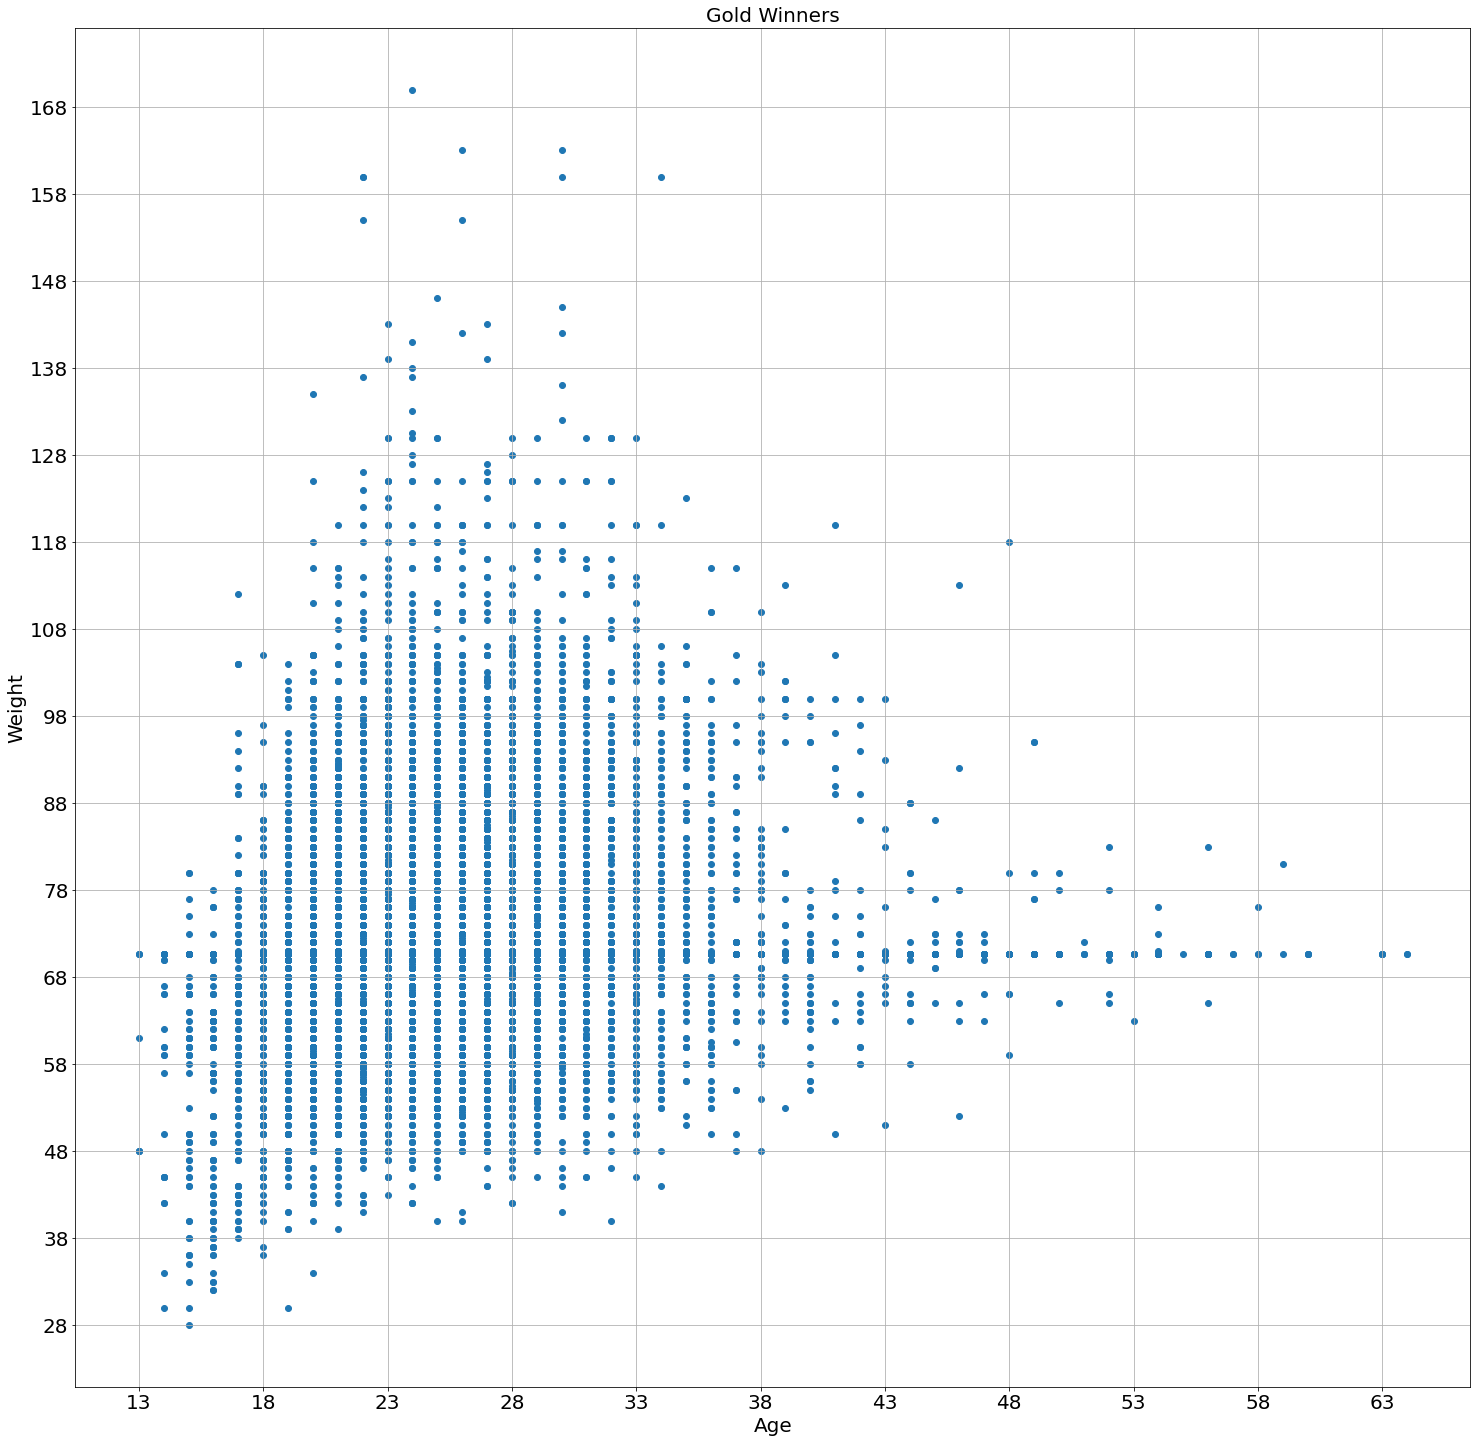

In [384]:
# display(df_gold.sample(5))
print(df_gold["Medal"].unique())


plt.figure(figsize=(25,25))
plt.scatter (x= "Age", y="Weight", data =df_gold)
plt.xlabel("Age",fontsize = 20)
plt.ylabel("Weight",fontsize = 20)
plt.title("Gold Winners",fontsize = 20)
plt.xticks(np.arange(df_gold["Age"].min(),df_gold["Age"].max(),5), fontsize=20,)
plt.yticks(np.arange(df_gold["Weight"].min(),df_gold["Weight"].max(),10),fontsize=20)
plt.grid()
plt.show()

<p> From the upper plot, we see that there is no correlation between "Age" and "Weight" for gold winners.</p> 